<a href="https://colab.research.google.com/github/MHosseinHashemi/Roshan_Internship/blob/main/TB_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Dataset From Kaggle

In [ ]:
# !pip install kaggle

In [ ]:
from google.colab import files
import zipfile

In [ ]:
# files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadhossein77","key":"baf77bc4d87e9f29e2f74205c19ea709"}'}

In [ ]:
# ! mkdir ~/.kaggle

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 99% 660M/663M [00:21<00:00, 34.3MB/s]
100% 663M/663M [00:21<00:00, 32.7MB/s]


In [ ]:
# zip_ref = zipfile.ZipFile('/content/tuberculosis-tb-chest-xray-dataset.zip', 'r')

In [ ]:
# zip_ref.extractall('/content/Dataset')

In [ ]:
# zip_ref.close()

# Explorationary Data Analysis

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import warnings
import os

warnings.filterwarnings('ignore')

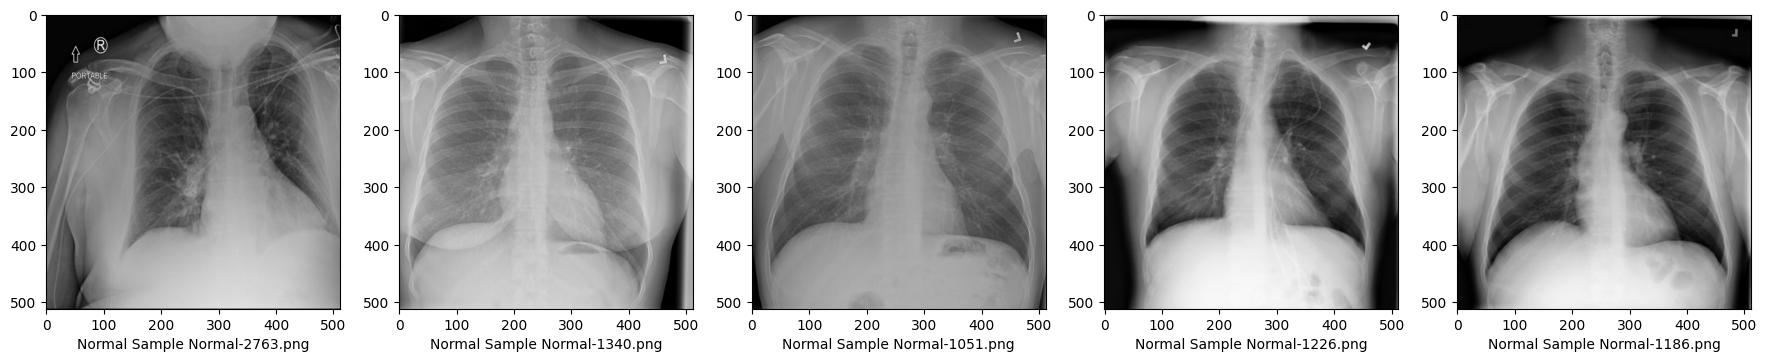

In [ ]:
# # Simple scripts to look over some of the Images
# root = "/content/Dataset/TB_Chest_Radiography_Database/Normal"

# fig, ax = plt.subplots(1,5, figsize=(22,8))
# for i , index in enumerate(os.listdir(root)):
#   if i<5:
#     temp_path = os.path.join(root, index)
#     img = Image.open(temp_path)
#     ax[i].imshow(img)
#     ax[i].set_xlabel(f"Normal Sample {index}", fontsize=10, color='black')


#   else:
#     break

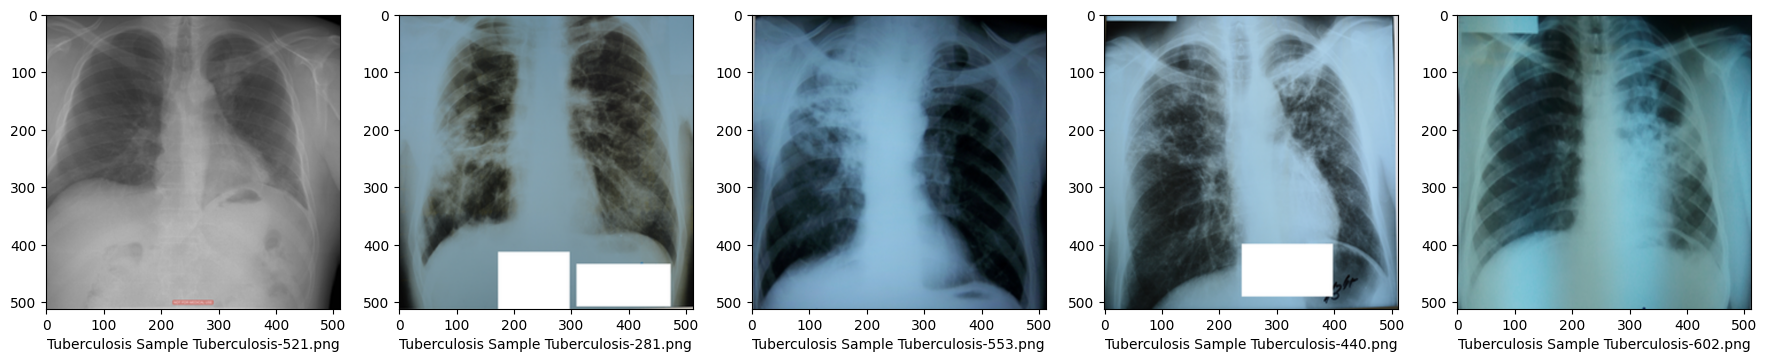

In [ ]:
# # Simple scripts to look over some of the Images
# root = "/content/Dataset/TB_Chest_Radiography_Database/Tuberculosis"

# fig, ax = plt.subplots(1,5, figsize=(22,8))
# for i , index in enumerate(os.listdir(root)):
#   if i<5:
#     temp_path = os.path.join(root, index)
#     img = Image.open(temp_path)
#     ax[i].imshow(img)
#     ax[i].set_xlabel(f"Tuberculosis Sample {index}", fontsize=10, color='black')


#   else:
#     break

### Initial Facts:

1.   *Based on most recent [WHO Report](https://www.who.int/teams/global-tuberculosis-programme/tb-reports/global-tuberculosis-report-2022/tb-disease-burden/2-1-tb-incidence), the insidence rate of TB in 2021 was **%0.134** (134/100k).*
2.   *In order to make this research even more specific, we conisder additional the insidence rate of Iran **(%0.012)** in our angle of research.*
3.   *Considering the negligible value of incidence rate, The Task is Anomally Detection.*


In [ ]:
# root = "/content/Dataset/TB_Chest_Radiography_Database//Tuberculosis"

# # Checking the sizes
# temp_list=[]
# for i , index in enumerate(os.listdir(root)):
#     temp_path = os.path.join(root, index)
#     img = Image.open(temp_path)
#     shapes = img.size
#     temp_list.append(shapes)

# if len(set(temp_list)) == 1:
#     print(f"They all sized {temp_list[0]}")
# else:
#     print("Not Same size.")

In [ ]:
from tqdm import tqdm

# Collecting all the correspounding addresses for the Pics
def reader(image_dir):
    images_path = []
    # Reads all the paths to the images
    for idx in tqdm(os.listdir(image_dir)):
      img_path = os.path.join(image_dir, idx)
      if img_path.endswith('.png'):
        if "Tuberculosis" in idx:
            images_path.append({"Address":img_path, "Label":"TB"})
        elif "Normal" in idx:
            images_path.append({"Address":img_path, "Label":"No"})
        else:
            print("Error! Something went wrong...")
            print(img_path)

    return images_path

In [ ]:
# paths_1 = reader("/content/Dataset/TB_Chest_Radiography_Database/Normal")

100%|██████████| 3500/3500 [00:00<00:00, 304932.57it/s]


In [ ]:
# paths_2 = reader("/content/Dataset/TB_Chest_Radiography_Database/Tuberculosis")

100%|██████████| 700/700 [00:00<00:00, 229663.08it/s]


In [ ]:
# # Expected to be 4200
# paths = paths_1 + paths_2
# len(paths)

4200

In [ ]:
# Just a Check on the format
# paths[55:60]

[{'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-3072.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-1527.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-1501.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-2743.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-1863.png',
  'Label': 'No'}]

In [ ]:
# # Just to make it easier to analyze
# df = pd.DataFrame(paths)
# df.head()

,Address,Label
0,/content/Dataset/TB_Chest_Radiography_Database...,No
1,/content/Dataset/TB_Chest_Radiography_Database...,No
2,/content/Dataset/TB_Chest_Radiography_Database...,No
3,/content/Dataset/TB_Chest_Radiography_Database...,No
4,/content/Dataset/TB_Chest_Radiography_Database...,No


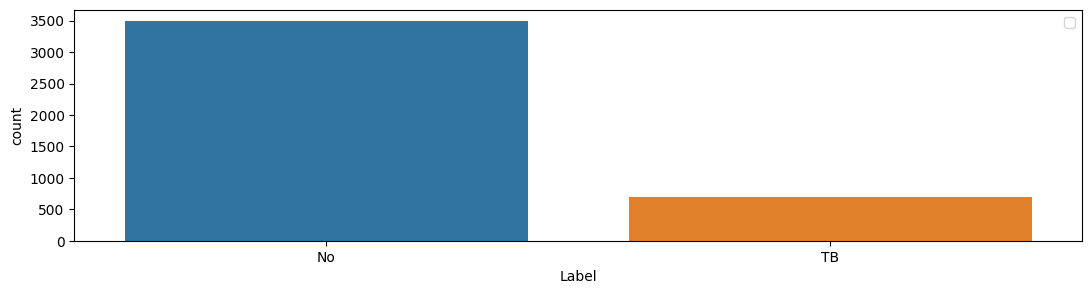

In [ ]:
# # Looking at the data Distibution
# import seaborn as sns

# plt.figure(figsize=(13, 3))
# sns.countplot(data=df, x="Label")
# plt.legend()
# plt.show()

In [ ]:
# df["Label"].value_counts(normalize=True)*100

No    83.333333
TB    16.666667
Name: Label, dtype: float64

# Load and Data preprocess

In [ ]:
import random

In [ ]:
# random.shuffle(paths)
# # Double Check
# paths[:10]

[{'Address': '/content/Dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-81.png',
  'Label': 'TB'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-317.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-219.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-2977.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-2912.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-281.png',
  'Label': 'TB'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-2251.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-3426.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radiography_Database/Normal/Normal-2220.png',
  'Label': 'No'},
 {'Address': '/content/Dataset/TB_Chest_Radio

# Load Custom Data Augmentation Module

In [ ]:
# !cp /content/drive/MyDrive/Colab\ Notebooks/data_and_label_augmentation.py /content

In [ ]:
# import data_and_label_augmentation as Datagenerator

# Data augmentation

In [ ]:
# Augmentor = Datagenerator.Image_Custom_Augmentation(SP_intensity=False,
#                                     RO_Key=40,
#                                     Br_intensity=40,
#                                     H_Key = True,
#                                     V_Key = True)

In [ ]:
# input_path = "/content/Dataset/TB_Chest_Radiography_Database/Tuberculosis"
# output_path = "/content/drive/MyDrive/Colab Notebooks/New_dataset/TB"

# Augmentor.Generate_Data(input_path,output_path)

  0%|          | 2/700 [00:00<02:07,  5.48it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  1%|          | 4/700 [00:00<02:08,  5.41it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  1%|          | 6/700 [00:01<02:10,  5.31it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  1%|          | 8/700 [00:01<01:58,  5.85it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  1%|▏         | 10/700 [00:01<01:56,  5.90it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  2%|▏         | 12/700 [00:02<02:01,  5.68it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  2%|▏         | 14/700 [00:02<02:02,  5.61it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  2%|▏         | 16/700 [00:02<01:56,  5.86it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  3%|▎         | 18/700 [00:03<02:04,  5.48it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  3%|▎         | 20/700 [00:03<01:52,  6.07it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  3%|▎         | 22/700 [00:03<01:37,  6.97it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  3%|▎         | 24/700 [00:04<01:37,  6.93it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  4%|▎         | 26/700 [00:04<01:35,  7.06it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  4%|▍         | 28/700 [00:04<01:39,  6.76it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  4%|▍         | 30/700 [00:04<01:45,  6.33it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  4%|▍         | 31/700 [00:05<01:45,  6.33it/s]

Error! No functionality has been called.


  5%|▍         | 33/700 [00:05<02:02,  5.45it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  5%|▍         | 34/700 [00:05<01:52,  5.95it/s]

Error! No functionality has been called.


  5%|▌         | 36/700 [00:06<01:58,  5.60it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  5%|▌         | 38/700 [00:06<02:03,  5.36it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  6%|▌         | 40/700 [00:06<01:50,  5.96it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  6%|▌         | 41/700 [00:06<01:54,  5.73it/s]

Error! No functionality has been called.


  6%|▌         | 43/700 [00:07<02:04,  5.26it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  6%|▋         | 45/700 [00:07<02:04,  5.25it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  7%|▋         | 47/700 [00:08<02:05,  5.19it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  7%|▋         | 49/700 [00:08<01:58,  5.47it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  7%|▋         | 51/700 [00:08<02:06,  5.12it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  7%|▋         | 52/700 [00:09<02:19,  4.63it/s]

Error! No functionality has been called.


  8%|▊         | 53/700 [00:09<02:30,  4.30it/s]

Error! No functionality has been called.


  8%|▊         | 54/700 [00:09<02:26,  4.42it/s]

Error! No functionality has been called.


  8%|▊         | 55/700 [00:09<02:32,  4.24it/s]

Error! No functionality has been called.


  8%|▊         | 56/700 [00:10<04:06,  2.61it/s]

Error! No functionality has been called.


  8%|▊         | 58/700 [00:11<03:11,  3.36it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  8%|▊         | 59/700 [00:11<02:57,  3.62it/s]

Error! No functionality has been called.


  9%|▊         | 61/700 [00:11<02:32,  4.18it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  9%|▉         | 63/700 [00:12<02:19,  4.55it/s]

Error! No functionality has been called.
Error! No functionality has been called.


  9%|▉         | 65/700 [00:12<02:04,  5.11it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 10%|▉         | 67/700 [00:12<01:56,  5.42it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 10%|▉         | 68/700 [00:13<01:55,  5.46it/s]

Error! No functionality has been called.


 10%|█         | 70/700 [00:13<01:49,  5.75it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 10%|█         | 72/700 [00:13<01:55,  5.46it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 10%|█         | 73/700 [00:13<01:58,  5.29it/s]

Error! No functionality has been called.


 11%|█         | 75/700 [00:14<01:52,  5.58it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 11%|█         | 76/700 [00:14<01:46,  5.88it/s]

Error! No functionality has been called.


 11%|█         | 78/700 [00:14<01:51,  5.55it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 11%|█▏        | 80/700 [00:15<01:41,  6.11it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 12%|█▏        | 82/700 [00:15<01:50,  5.60it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 12%|█▏        | 84/700 [00:15<01:40,  6.10it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 12%|█▏        | 86/700 [00:16<01:42,  6.02it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 13%|█▎        | 88/700 [00:16<01:49,  5.58it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 13%|█▎        | 89/700 [00:16<01:46,  5.74it/s]

Error! No functionality has been called.


 13%|█▎        | 91/700 [00:17<01:52,  5.39it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 13%|█▎        | 93/700 [00:17<01:41,  5.99it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 14%|█▎        | 95/700 [00:17<01:38,  6.15it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 14%|█▎        | 96/700 [00:17<01:44,  5.78it/s]

Error! No functionality has been called.


 14%|█▍        | 98/700 [00:18<01:50,  5.47it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 14%|█▍        | 100/700 [00:18<01:44,  5.75it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 14%|█▍        | 101/700 [00:18<01:52,  5.31it/s]

Error! No functionality has been called.


 15%|█▍        | 102/700 [00:19<01:55,  5.16it/s]

Error! No functionality has been called.


 15%|█▍        | 103/700 [00:19<02:03,  4.85it/s]

Error! No functionality has been called.


 15%|█▌        | 105/700 [00:19<01:54,  5.22it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 15%|█▌        | 107/700 [00:20<01:54,  5.18it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 16%|█▌        | 109/700 [00:20<01:48,  5.47it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 16%|█▌        | 111/700 [00:20<01:40,  5.85it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 16%|█▌        | 113/700 [00:21<01:41,  5.78it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 16%|█▋        | 115/700 [00:21<01:38,  5.92it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 17%|█▋        | 116/700 [00:21<01:51,  5.26it/s]

Error! No functionality has been called.


 17%|█▋        | 117/700 [00:21<01:57,  4.96it/s]

Error! No functionality has been called.


 17%|█▋        | 119/700 [00:22<01:57,  4.94it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 17%|█▋        | 120/700 [00:22<01:57,  4.92it/s]

Error! No functionality has been called.


 17%|█▋        | 121/700 [00:22<02:17,  4.20it/s]

Error! No functionality has been called.


 17%|█▋        | 122/700 [00:23<02:14,  4.31it/s]

Error! No functionality has been called.


 18%|█▊        | 123/700 [00:23<02:10,  4.41it/s]

Error! No functionality has been called.


 18%|█▊        | 125/700 [00:23<02:05,  4.57it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 18%|█▊        | 126/700 [00:24<02:13,  4.31it/s]

Error! No functionality has been called.


 18%|█▊        | 127/700 [00:24<02:13,  4.30it/s]

Error! No functionality has been called.


 18%|█▊        | 128/700 [00:24<02:15,  4.23it/s]

Error! No functionality has been called.


 18%|█▊        | 129/700 [00:24<02:15,  4.21it/s]

Error! No functionality has been called.


 19%|█▊        | 130/700 [00:24<02:16,  4.17it/s]

Error! No functionality has been called.


 19%|█▉        | 132/700 [00:25<02:11,  4.33it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 19%|█▉        | 134/700 [00:25<01:54,  4.96it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 19%|█▉        | 135/700 [00:25<01:52,  5.00it/s]

Error! No functionality has been called.


 20%|█▉        | 137/700 [00:26<01:52,  5.01it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 20%|█▉        | 138/700 [00:26<01:46,  5.29it/s]

Error! No functionality has been called.


 20%|██        | 140/700 [00:26<01:42,  5.45it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 20%|██        | 141/700 [00:27<01:39,  5.61it/s]

Error! No functionality has been called.


 20%|██        | 143/700 [00:27<01:42,  5.43it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 21%|██        | 145/700 [00:27<01:38,  5.61it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 21%|██        | 147/700 [00:28<01:39,  5.56it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 21%|██▏       | 149/700 [00:28<01:50,  4.98it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 22%|██▏       | 151/700 [00:28<01:34,  5.83it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 22%|██▏       | 153/700 [00:29<01:29,  6.11it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 22%|██▏       | 155/700 [00:29<01:33,  5.86it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 22%|██▏       | 157/700 [00:29<01:37,  5.60it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 23%|██▎       | 158/700 [00:30<01:39,  5.44it/s]

Error! No functionality has been called.


 23%|██▎       | 159/700 [00:30<01:45,  5.13it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 23%|██▎       | 161/700 [00:30<01:45,  5.11it/s]

Error! No functionality has been called.


 23%|██▎       | 163/700 [00:31<01:45,  5.09it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 23%|██▎       | 164/700 [00:31<01:46,  5.03it/s]

Error! No functionality has been called.


 24%|██▎       | 166/700 [00:31<01:52,  4.74it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 24%|██▍       | 168/700 [00:32<01:47,  4.97it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 24%|██▍       | 169/700 [00:32<01:42,  5.17it/s]

Error! No functionality has been called.


 24%|██▍       | 171/700 [00:32<01:37,  5.40it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 25%|██▍       | 173/700 [00:33<01:40,  5.24it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 25%|██▌       | 175/700 [00:33<01:36,  5.44it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 25%|██▌       | 177/700 [00:33<01:39,  5.28it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 26%|██▌       | 179/700 [00:34<01:35,  5.47it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 26%|██▌       | 181/700 [00:34<01:30,  5.72it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 26%|██▌       | 182/700 [00:34<01:35,  5.42it/s]

Error! No functionality has been called.


 26%|██▌       | 183/700 [00:35<02:03,  4.18it/s]

Error! No functionality has been called.


 26%|██▋       | 184/700 [00:35<02:09,  3.97it/s]

Error! No functionality has been called.


 27%|██▋       | 186/700 [00:35<01:51,  4.60it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 27%|██▋       | 187/700 [00:36<01:46,  4.82it/s]

Error! No functionality has been called.


 27%|██▋       | 188/700 [00:36<01:48,  4.70it/s]

Error! No functionality has been called.


 27%|██▋       | 189/700 [00:36<01:47,  4.74it/s]

Error! No functionality has been called.


 27%|██▋       | 190/700 [00:36<01:52,  4.55it/s]

Error! No functionality has been called.


 27%|██▋       | 191/700 [00:36<01:54,  4.43it/s]

Error! No functionality has been called.


 28%|██▊       | 193/700 [00:37<01:49,  4.62it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 28%|██▊       | 195/700 [00:37<01:41,  5.00it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 28%|██▊       | 197/700 [00:38<01:40,  5.00it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 28%|██▊       | 198/700 [00:38<01:46,  4.70it/s]

Error! No functionality has been called.


 28%|██▊       | 199/700 [00:38<01:57,  4.26it/s]

Error! No functionality has been called.


 29%|██▊       | 200/700 [00:39<02:09,  3.86it/s]

Error! No functionality has been called.


 29%|██▉       | 202/700 [00:39<01:56,  4.27it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 29%|██▉       | 203/700 [00:39<01:53,  4.38it/s]

Error! No functionality has been called.


 29%|██▉       | 205/700 [00:40<01:43,  4.76it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 29%|██▉       | 206/700 [00:40<01:45,  4.67it/s]

Error! No functionality has been called.


 30%|██▉       | 207/700 [00:40<01:44,  4.73it/s]

Error! No functionality has been called.


 30%|██▉       | 208/700 [00:40<01:43,  4.77it/s]

Error! No functionality has been called.


 30%|███       | 210/700 [00:41<01:37,  5.02it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 30%|███       | 212/700 [00:41<01:30,  5.42it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 31%|███       | 214/700 [00:41<01:29,  5.45it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 31%|███       | 216/700 [00:42<01:25,  5.66it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 31%|███       | 218/700 [00:42<01:31,  5.25it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 31%|███▏      | 220/700 [00:42<01:36,  4.96it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 32%|███▏      | 222/700 [00:43<01:22,  5.77it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 32%|███▏      | 223/700 [00:43<01:19,  6.00it/s]

Error! No functionality has been called.


 32%|███▏      | 225/700 [00:43<01:20,  5.88it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 32%|███▏      | 227/700 [00:44<01:24,  5.61it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 33%|███▎      | 229/700 [00:44<01:32,  5.09it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 33%|███▎      | 230/700 [00:44<01:28,  5.34it/s]

Error! No functionality has been called.


 33%|███▎      | 232/700 [00:45<01:32,  5.06it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 33%|███▎      | 234/700 [00:45<01:21,  5.73it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 34%|███▎      | 236/700 [00:45<01:20,  5.76it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 34%|███▍      | 238/700 [00:46<01:16,  6.02it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 34%|███▍      | 240/700 [00:46<01:15,  6.09it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 34%|███▍      | 241/700 [00:46<01:13,  6.21it/s]

Error! No functionality has been called.


 35%|███▍      | 243/700 [00:47<01:22,  5.54it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 35%|███▍      | 244/700 [00:47<01:18,  5.79it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 35%|███▌      | 246/700 [00:47<01:24,  5.34it/s]

Error! No functionality has been called.


 35%|███▌      | 248/700 [00:47<01:19,  5.70it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 36%|███▌      | 250/700 [00:48<01:13,  6.13it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 36%|███▌      | 251/700 [00:48<01:11,  6.25it/s]

Error! No functionality has been called.


 36%|███▌      | 253/700 [00:48<01:21,  5.52it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 36%|███▋      | 254/700 [00:48<01:17,  5.78it/s]

Error! No functionality has been called.


 36%|███▋      | 255/700 [00:49<01:33,  4.76it/s]

Error! No functionality has been called.


 37%|███▋      | 257/700 [00:49<01:29,  4.92it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 37%|███▋      | 258/700 [00:49<01:22,  5.39it/s]

Error! No functionality has been called.


 37%|███▋      | 260/700 [00:50<01:26,  5.12it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 37%|███▋      | 261/700 [00:50<01:20,  5.47it/s]

Error! No functionality has been called.


 38%|███▊      | 263/700 [00:50<01:18,  5.57it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 38%|███▊      | 264/700 [00:50<01:18,  5.52it/s]

Error! No functionality has been called.


 38%|███▊      | 265/700 [00:51<01:27,  4.96it/s]

Error! No functionality has been called.


 38%|███▊      | 267/700 [00:51<01:30,  4.81it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 38%|███▊      | 268/700 [00:51<01:25,  5.08it/s]

Error! No functionality has been called.


 38%|███▊      | 269/700 [00:52<01:35,  4.53it/s]

Error! No functionality has been called.


 39%|███▊      | 270/700 [00:52<01:38,  4.38it/s]

Error! No functionality has been called.


 39%|███▉      | 272/700 [00:52<01:33,  4.57it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 39%|███▉      | 274/700 [00:53<01:30,  4.72it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 39%|███▉      | 276/700 [00:53<01:23,  5.05it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 40%|███▉      | 277/700 [00:53<01:19,  5.34it/s]

Error! No functionality has been called.


 40%|███▉      | 278/700 [00:53<01:31,  4.62it/s]

Error! No functionality has been called.


 40%|████      | 280/700 [00:54<01:45,  3.98it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 40%|████      | 281/700 [00:54<01:50,  3.78it/s]

Error! No functionality has been called.


 40%|████      | 282/700 [00:55<01:49,  3.83it/s]

Error! No functionality has been called.


 41%|████      | 284/700 [00:55<01:36,  4.32it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 41%|████      | 286/700 [00:55<01:28,  4.68it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 41%|████      | 288/700 [00:56<01:19,  5.16it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 41%|████▏     | 290/700 [00:56<01:19,  5.16it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 42%|████▏     | 292/700 [00:57<01:14,  5.49it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 42%|████▏     | 294/700 [00:57<01:13,  5.50it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 42%|████▏     | 296/700 [00:57<01:11,  5.67it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 43%|████▎     | 298/700 [00:58<01:09,  5.80it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 43%|████▎     | 300/700 [00:58<01:12,  5.53it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 43%|████▎     | 302/700 [00:58<01:11,  5.59it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 43%|████▎     | 304/700 [00:59<01:05,  6.07it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 44%|████▎     | 306/700 [00:59<01:10,  5.62it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 44%|████▍     | 308/700 [00:59<01:04,  6.10it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 44%|████▍     | 309/700 [01:00<01:11,  5.49it/s]

Error! No functionality has been called.


 44%|████▍     | 310/700 [01:00<01:17,  5.05it/s]

Error! No functionality has been called.


 44%|████▍     | 311/700 [01:00<01:18,  4.97it/s]

Error! No functionality has been called.


 45%|████▍     | 313/700 [01:00<01:19,  4.88it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 45%|████▌     | 315/700 [01:01<01:12,  5.33it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 45%|████▌     | 317/700 [01:01<01:05,  5.86it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 46%|████▌     | 319/700 [01:01<01:05,  5.78it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 46%|████▌     | 320/700 [01:02<01:08,  5.57it/s]

Error! No functionality has been called.


 46%|████▌     | 321/700 [01:02<01:12,  5.25it/s]

Error! No functionality has been called.


 46%|████▌     | 323/700 [01:02<01:12,  5.17it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 46%|████▋     | 325/700 [01:03<01:17,  4.83it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 47%|████▋     | 326/700 [01:03<01:13,  5.07it/s]

Error! No functionality has been called.
Error! No functionality has been called.

 47%|████▋     | 328/700 [01:03<01:13,  5.05it/s]


Error! No functionality has been called.


 47%|████▋     | 330/700 [01:04<01:13,  5.06it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 47%|████▋     | 331/700 [01:04<01:10,  5.20it/s]

Error! No functionality has been called.


 47%|████▋     | 332/700 [01:04<01:12,  5.10it/s]

Error! No functionality has been called.


 48%|████▊     | 334/700 [01:04<01:14,  4.89it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 48%|████▊     | 336/700 [01:05<01:08,  5.33it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 48%|████▊     | 337/700 [01:05<01:08,  5.28it/s]

Error! No functionality has been called.


 48%|████▊     | 338/700 [01:05<01:30,  3.99it/s]

Error! No functionality has been called.


 48%|████▊     | 339/700 [01:06<01:31,  3.96it/s]

Error! No functionality has been called.


 49%|████▊     | 341/700 [01:06<01:21,  4.39it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 49%|████▉     | 343/700 [01:06<01:12,  4.92it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 49%|████▉     | 344/700 [01:07<01:16,  4.67it/s]

Error! No functionality has been called.


 49%|████▉     | 346/700 [01:07<01:13,  4.79it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 50%|████▉     | 347/700 [01:07<01:11,  4.93it/s]

Error! No functionality has been called.


 50%|████▉     | 348/700 [01:08<01:17,  4.55it/s]

Error! No functionality has been called.


 50%|████▉     | 349/700 [01:08<01:20,  4.36it/s]

Error! No functionality has been called.


 50%|█████     | 350/700 [01:08<01:20,  4.36it/s]

Error! No functionality has been called.


 50%|█████     | 351/700 [01:08<01:20,  4.34it/s]

Error! No functionality has been called.


 50%|█████     | 352/700 [01:08<01:21,  4.25it/s]

Error! No functionality has been called.


 51%|█████     | 354/700 [01:09<01:11,  4.81it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 51%|█████     | 355/700 [01:09<01:10,  4.90it/s]

Error! No functionality has been called.


 51%|█████     | 356/700 [01:09<01:19,  4.30it/s]

Error! No functionality has been called.


 51%|█████     | 358/700 [01:10<01:14,  4.59it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 51%|█████▏    | 360/700 [01:10<01:08,  4.99it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 52%|█████▏    | 361/700 [01:10<01:04,  5.29it/s]

Error! No functionality has been called.


 52%|█████▏    | 363/700 [01:11<01:01,  5.44it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 52%|█████▏    | 364/700 [01:11<01:01,  5.45it/s]

Error! No functionality has been called.


 52%|█████▏    | 365/700 [01:11<01:03,  5.28it/s]

Error! No functionality has been called.


 52%|█████▏    | 367/700 [01:11<01:05,  5.08it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 53%|█████▎    | 368/700 [01:12<01:05,  5.07it/s]

Error! No functionality has been called.


 53%|█████▎    | 370/700 [01:12<01:05,  5.06it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 53%|█████▎    | 372/700 [01:12<01:01,  5.32it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 53%|█████▎    | 374/700 [01:13<00:54,  5.95it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 54%|█████▎    | 376/700 [01:13<00:54,  5.98it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 54%|█████▍    | 378/700 [01:13<00:50,  6.42it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 54%|█████▍    | 380/700 [01:14<00:55,  5.75it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 55%|█████▍    | 382/700 [01:14<00:55,  5.73it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 55%|█████▍    | 384/700 [01:14<00:56,  5.61it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 55%|█████▌    | 385/700 [01:15<01:01,  5.14it/s]

Error! No functionality has been called.


 55%|█████▌    | 387/700 [01:15<00:59,  5.26it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 55%|█████▌    | 388/700 [01:15<00:59,  5.21it/s]

Error! No functionality has been called.


 56%|█████▌    | 389/700 [01:15<01:01,  5.02it/s]

Error! No functionality has been called.


 56%|█████▌    | 391/700 [01:16<01:12,  4.28it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 56%|█████▌    | 393/700 [01:16<00:59,  5.17it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 56%|█████▋    | 395/700 [01:17<00:58,  5.24it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 57%|█████▋    | 396/700 [01:17<00:52,  5.74it/s]

Error! No functionality has been called.


 57%|█████▋    | 398/700 [01:17<00:54,  5.56it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 57%|█████▋    | 399/700 [01:17<00:51,  5.79it/s]

Error! No functionality has been called.


 57%|█████▋    | 401/700 [01:18<00:50,  5.94it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 58%|█████▊    | 403/700 [01:18<00:49,  5.95it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 58%|█████▊    | 405/700 [01:18<00:46,  6.30it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 58%|█████▊    | 407/700 [01:19<00:49,  5.93it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 58%|█████▊    | 409/700 [01:19<00:47,  6.07it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 59%|█████▊    | 410/700 [01:19<00:44,  6.54it/s]

Error! No functionality has been called.


 59%|█████▉    | 412/700 [01:20<00:51,  5.62it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 59%|█████▉    | 413/700 [01:20<00:48,  5.86it/s]

Error! No functionality has been called.


 59%|█████▉    | 414/700 [01:20<00:58,  4.90it/s]

Error! No functionality has been called.


 59%|█████▉    | 415/700 [01:20<00:58,  4.85it/s]

Error! No functionality has been called.


 59%|█████▉    | 416/700 [01:21<01:02,  4.58it/s]

Error! No functionality has been called.


 60%|█████▉    | 417/700 [01:21<01:08,  4.15it/s]

Error! No functionality has been called.


 60%|█████▉    | 419/700 [01:21<00:59,  4.69it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 60%|██████    | 420/700 [01:21<01:01,  4.57it/s]

Error! No functionality has been called.


 60%|██████    | 421/700 [01:22<01:02,  4.50it/s]

Error! No functionality has been called.


 60%|██████    | 422/700 [01:22<01:04,  4.33it/s]

Error! No functionality has been called.


 60%|██████    | 423/700 [01:22<01:02,  4.46it/s]

Error! No functionality has been called.


 61%|██████    | 425/700 [01:23<00:59,  4.61it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 61%|██████    | 426/700 [01:23<01:03,  4.35it/s]

Error! No functionality has been called.


 61%|██████    | 428/700 [01:23<00:58,  4.63it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 61%|██████▏   | 430/700 [01:24<00:52,  5.19it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 62%|██████▏   | 432/700 [01:24<00:53,  5.02it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 62%|██████▏   | 433/700 [01:24<01:14,  3.60it/s]

Error! No functionality has been called.


 62%|██████▏   | 435/700 [01:25<01:17,  3.43it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 62%|██████▏   | 437/700 [01:25<01:01,  4.27it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 63%|██████▎   | 438/700 [01:26<01:19,  3.30it/s]

Error! No functionality has been called.


 63%|██████▎   | 440/700 [01:26<01:08,  3.81it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 63%|██████▎   | 442/700 [01:27<01:06,  3.90it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 63%|██████▎   | 443/700 [01:27<01:02,  4.12it/s]

Error! No functionality has been called.


 64%|██████▎   | 445/700 [01:28<00:55,  4.58it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 64%|██████▎   | 446/700 [01:28<00:52,  4.83it/s]

Error! No functionality has been called.


 64%|██████▍   | 447/700 [01:28<00:53,  4.73it/s]

Error! No functionality has been called.


 64%|██████▍   | 449/700 [01:28<00:51,  4.91it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 64%|██████▍   | 450/700 [01:29<00:49,  5.09it/s]

Error! No functionality has been called.


 65%|██████▍   | 452/700 [01:29<00:48,  5.14it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 65%|██████▍   | 454/700 [01:29<00:43,  5.65it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 65%|██████▌   | 456/700 [01:30<00:42,  5.69it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 65%|██████▌   | 457/700 [01:30<00:44,  5.43it/s]

Error! No functionality has been called.


 65%|██████▌   | 458/700 [01:30<00:47,  5.11it/s]

Error! No functionality has been called.


 66%|██████▌   | 460/700 [01:30<00:47,  5.05it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 66%|██████▌   | 462/700 [01:31<00:43,  5.44it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 66%|██████▋   | 464/700 [01:31<00:41,  5.72it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 67%|██████▋   | 466/700 [01:31<00:41,  5.60it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 67%|██████▋   | 468/700 [01:32<00:40,  5.79it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 67%|██████▋   | 470/700 [01:32<00:43,  5.30it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 67%|██████▋   | 472/700 [01:33<00:44,  5.15it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 68%|██████▊   | 474/700 [01:33<00:37,  5.98it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 68%|██████▊   | 475/700 [01:33<00:36,  6.15it/s]

Error! No functionality has been called.


 68%|██████▊   | 476/700 [01:33<00:39,  5.63it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 68%|██████▊   | 478/700 [01:34<00:41,  5.29it/s]

Error! No functionality has been called.


 69%|██████▊   | 480/700 [01:34<00:41,  5.36it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 69%|██████▉   | 482/700 [01:34<00:39,  5.48it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 69%|██████▉   | 484/700 [01:35<00:34,  6.24it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 69%|██████▉   | 485/700 [01:35<00:40,  5.36it/s]

Error! No functionality has been called.


 69%|██████▉   | 486/700 [01:35<00:45,  4.66it/s]

Error! No functionality has been called.


 70%|██████▉   | 488/700 [01:36<00:44,  4.75it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 70%|███████   | 490/700 [01:36<00:42,  4.90it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 70%|███████   | 491/700 [01:36<00:45,  4.61it/s]

Error! No functionality has been called.


 70%|███████   | 492/700 [01:37<00:47,  4.42it/s]

Error! No functionality has been called.


 70%|███████   | 493/700 [01:37<00:50,  4.09it/s]

Error! No functionality has been called.


 71%|███████   | 495/700 [01:37<00:45,  4.47it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 71%|███████   | 496/700 [01:37<00:48,  4.24it/s]

Error! No functionality has been called.


 71%|███████   | 498/700 [01:38<00:45,  4.46it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 71%|███████▏  | 499/700 [01:38<00:46,  4.33it/s]

Error! No functionality has been called.


 72%|███████▏  | 501/700 [01:39<00:43,  4.58it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 72%|███████▏  | 502/700 [01:39<00:46,  4.23it/s]

Error! No functionality has been called.


 72%|███████▏  | 504/700 [01:39<00:44,  4.39it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 72%|███████▏  | 505/700 [01:40<00:47,  4.14it/s]

Error! No functionality has been called.


 72%|███████▏  | 506/700 [01:40<00:45,  4.26it/s]

Error! No functionality has been called.


 73%|███████▎  | 508/700 [01:40<00:42,  4.54it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 73%|███████▎  | 510/700 [01:41<00:35,  5.40it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 73%|███████▎  | 511/700 [01:41<00:34,  5.56it/s]

Error! No functionality has been called.


 73%|███████▎  | 513/700 [01:41<00:34,  5.43it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 74%|███████▎  | 515/700 [01:41<00:33,  5.57it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 74%|███████▎  | 516/700 [01:42<00:33,  5.47it/s]

Error! No functionality has been called.


 74%|███████▍  | 518/700 [01:42<00:35,  5.14it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 74%|███████▍  | 520/700 [01:42<00:28,  6.34it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 75%|███████▍  | 522/700 [01:43<00:28,  6.30it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 75%|███████▍  | 524/700 [01:43<00:26,  6.64it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 75%|███████▌  | 526/700 [01:43<00:27,  6.35it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 75%|███████▌  | 528/700 [01:44<00:30,  5.64it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 76%|███████▌  | 530/700 [01:44<00:27,  6.22it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 76%|███████▌  | 532/700 [01:44<00:31,  5.39it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 76%|███████▋  | 534/700 [01:45<00:28,  5.89it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 76%|███████▋  | 535/700 [01:45<00:27,  6.00it/s]

Error! No functionality has been called.


 77%|███████▋  | 537/700 [01:45<00:30,  5.38it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 77%|███████▋  | 539/700 [01:46<00:29,  5.44it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 77%|███████▋  | 541/700 [01:46<00:28,  5.67it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 78%|███████▊  | 543/700 [01:46<00:26,  5.85it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 78%|███████▊  | 545/700 [01:47<00:27,  5.73it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 78%|███████▊  | 547/700 [01:47<00:27,  5.56it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 78%|███████▊  | 549/700 [01:48<00:34,  4.31it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 79%|███████▊  | 551/700 [01:48<00:29,  5.02it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 79%|███████▉  | 553/700 [01:48<00:26,  5.49it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 79%|███████▉  | 555/700 [01:49<00:22,  6.33it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 80%|███████▉  | 557/700 [01:49<00:24,  5.89it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 80%|███████▉  | 559/700 [01:49<00:24,  5.85it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 80%|████████  | 561/700 [01:50<00:23,  5.86it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 80%|████████  | 563/700 [01:50<00:24,  5.68it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 81%|████████  | 565/700 [01:50<00:23,  5.77it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 81%|████████  | 567/700 [01:51<00:26,  5.11it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 81%|████████  | 568/700 [01:51<00:26,  4.91it/s]

Error! No functionality has been called.


 81%|████████▏ | 569/700 [01:51<00:27,  4.77it/s]

Error! No functionality has been called.


 81%|████████▏ | 570/700 [01:51<00:28,  4.63it/s]

Error! No functionality has been called.


 82%|████████▏ | 571/700 [01:52<00:30,  4.21it/s]

Error! No functionality has been called.


 82%|████████▏ | 573/700 [01:52<00:29,  4.34it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 82%|████████▏ | 574/700 [01:52<00:29,  4.34it/s]

Error! No functionality has been called.


 82%|████████▏ | 575/700 [01:53<00:29,  4.25it/s]

Error! No functionality has been called.


 82%|████████▏ | 576/700 [01:53<00:29,  4.16it/s]

Error! No functionality has been called.


 83%|████████▎ | 578/700 [01:53<00:25,  4.78it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 83%|████████▎ | 580/700 [01:54<00:23,  5.13it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 83%|████████▎ | 582/700 [01:54<00:21,  5.40it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 83%|████████▎ | 583/700 [01:54<00:24,  4.71it/s]

Error! No functionality has been called.


 83%|████████▎ | 584/700 [01:55<00:25,  4.58it/s]

Error! No functionality has been called.


 84%|████████▎ | 586/700 [01:55<00:22,  5.17it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 84%|████████▍ | 588/700 [01:55<00:20,  5.52it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 84%|████████▍ | 589/700 [01:55<00:18,  6.00it/s]

Error! No functionality has been called.


 84%|████████▍ | 591/700 [01:56<00:20,  5.38it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 85%|████████▍ | 593/700 [01:56<00:19,  5.45it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 85%|████████▌ | 595/700 [01:56<00:17,  6.03it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 85%|████████▌ | 597/700 [01:57<00:16,  6.15it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 86%|████████▌ | 599/700 [01:57<00:17,  5.64it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 86%|████████▌ | 601/700 [01:58<00:23,  4.14it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 86%|████████▌ | 603/700 [01:58<00:19,  4.99it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 86%|████████▋ | 605/700 [01:59<00:18,  5.21it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 87%|████████▋ | 607/700 [01:59<00:16,  5.54it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 87%|████████▋ | 608/700 [01:59<00:16,  5.42it/s]

Error! No functionality has been called.
Error! No functionality has been called.

 87%|████████▋ | 610/700 [01:59<00:15,  5.71it/s]


Error! No functionality has been called.


 87%|████████▋ | 611/700 [02:00<00:15,  5.72it/s]

Error! No functionality has been called.


 87%|████████▋ | 612/700 [02:00<00:16,  5.37it/s]

Error! No functionality has been called.


 88%|████████▊ | 613/700 [02:00<00:17,  4.94it/s]

Error! No functionality has been called.


 88%|████████▊ | 615/700 [02:00<00:15,  5.35it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 88%|████████▊ | 617/700 [02:01<00:14,  5.57it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 88%|████████▊ | 619/700 [02:01<00:14,  5.59it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 89%|████████▊ | 620/700 [02:01<00:13,  5.83it/s]

Error! No functionality has been called.


 89%|████████▉ | 622/700 [02:02<00:13,  5.64it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 89%|████████▉ | 624/700 [02:02<00:13,  5.55it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 89%|████████▉ | 626/700 [02:02<00:12,  5.98it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 90%|████████▉ | 627/700 [02:02<00:12,  6.00it/s]

Error! No functionality has been called.


 90%|████████▉ | 629/700 [02:03<00:11,  5.98it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 90%|█████████ | 630/700 [02:03<00:11,  6.24it/s]

Error! No functionality has been called.


 90%|█████████ | 632/700 [02:03<00:11,  5.80it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 91%|█████████ | 634/700 [02:04<00:10,  6.33it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 91%|█████████ | 636/700 [02:04<00:11,  5.72it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 91%|█████████ | 637/700 [02:04<00:10,  5.94it/s]

Error! No functionality has been called.


 91%|█████████▏| 639/700 [02:05<00:10,  5.73it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 92%|█████████▏| 641/700 [02:05<00:09,  6.03it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 92%|█████████▏| 642/700 [02:05<00:11,  5.26it/s]

Error! No functionality has been called.


 92%|█████████▏| 643/700 [02:05<00:12,  4.69it/s]

Error! No functionality has been called.


 92%|█████████▏| 644/700 [02:06<00:11,  4.67it/s]

Error! No functionality has been called.


 92%|█████████▏| 646/700 [02:06<00:10,  4.96it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 93%|█████████▎| 648/700 [02:06<00:10,  4.81it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 93%|█████████▎| 649/700 [02:07<00:10,  4.69it/s]

Error! No functionality has been called.


 93%|█████████▎| 651/700 [02:07<00:10,  4.76it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 93%|█████████▎| 652/700 [02:07<00:10,  4.76it/s]

Error! No functionality has been called.


 93%|█████████▎| 653/700 [02:08<00:10,  4.42it/s]

Error! No functionality has been called.


 93%|█████████▎| 654/700 [02:08<00:10,  4.27it/s]

Error! No functionality has been called.


 94%|█████████▎| 655/700 [02:08<00:11,  3.99it/s]

Error! No functionality has been called.


 94%|█████████▎| 656/700 [02:08<00:10,  4.08it/s]

Error! No functionality has been called.


 94%|█████████▍| 657/700 [02:09<00:10,  4.05it/s]

Error! No functionality has been called.


 94%|█████████▍| 659/700 [02:09<00:09,  4.44it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 94%|█████████▍| 660/700 [02:09<00:08,  4.54it/s]

Error! No functionality has been called.


 95%|█████████▍| 662/700 [02:10<00:08,  4.70it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 95%|█████████▍| 664/700 [02:10<00:06,  5.58it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 95%|█████████▌| 666/700 [02:10<00:05,  6.13it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 95%|█████████▌| 667/700 [02:10<00:05,  6.29it/s]

Error! No functionality has been called.


 95%|█████████▌| 668/700 [02:11<00:05,  5.66it/s]

Error! No functionality has been called.


 96%|█████████▌| 670/700 [02:11<00:05,  5.82it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 96%|█████████▌| 672/700 [02:11<00:04,  6.37it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 96%|█████████▌| 673/700 [02:11<00:04,  6.33it/s]

Error! No functionality has been called.


 96%|█████████▋| 675/700 [02:12<00:04,  5.55it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 97%|█████████▋| 677/700 [02:12<00:04,  5.73it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 97%|█████████▋| 678/700 [02:12<00:03,  5.62it/s]

Error! No functionality has been called.


 97%|█████████▋| 680/700 [02:13<00:03,  5.69it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 97%|█████████▋| 681/700 [02:13<00:03,  5.55it/s]

Error! No functionality has been called.


 97%|█████████▋| 682/700 [02:13<00:03,  5.34it/s]

Error! No functionality has been called.


 98%|█████████▊| 684/700 [02:14<00:03,  5.07it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 98%|█████████▊| 686/700 [02:14<00:02,  5.01it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 98%|█████████▊| 687/700 [02:14<00:02,  5.05it/s]

Error! No functionality has been called.


 98%|█████████▊| 689/700 [02:15<00:02,  5.05it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 99%|█████████▊| 691/700 [02:15<00:01,  5.37it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 99%|█████████▉| 692/700 [02:15<00:01,  5.28it/s]

Error! No functionality has been called.


 99%|█████████▉| 694/700 [02:15<00:01,  5.40it/s]

Error! No functionality has been called.
Error! No functionality has been called.


 99%|█████████▉| 695/700 [02:16<00:00,  5.30it/s]

Error! No functionality has been called.


100%|█████████▉| 697/700 [02:16<00:00,  5.51it/s]

Error! No functionality has been called.
Error! No functionality has been called.


100%|█████████▉| 699/700 [02:16<00:00,  5.87it/s]

Error! No functionality has been called.
Error! No functionality has been called.


100%|██████████| 700/700 [02:17<00:00,  5.11it/s]

Error! No functionality has been called.


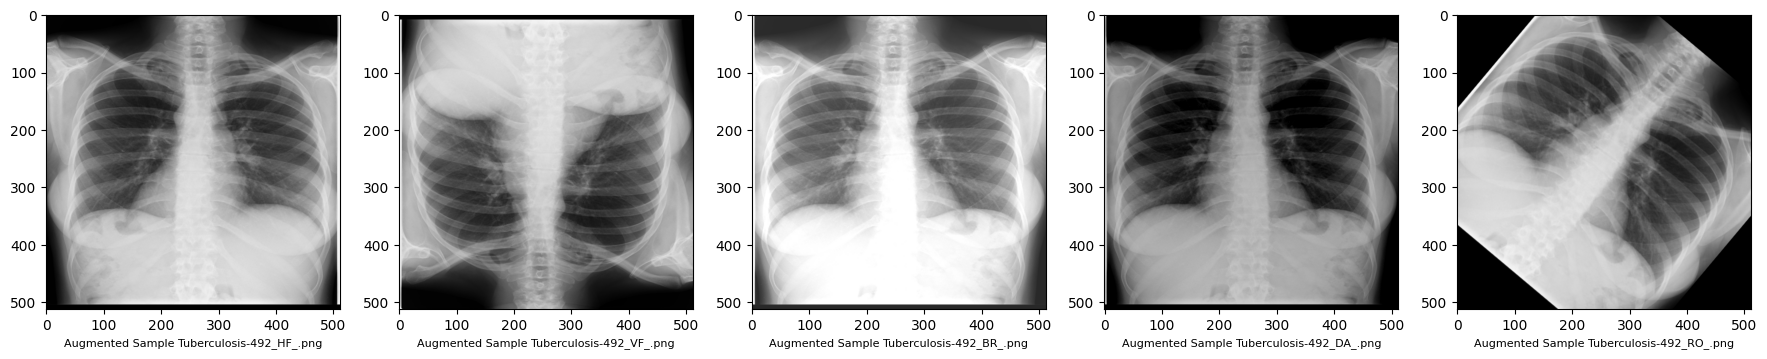

In [ ]:
# Checking the Augmentation Results
root = "/content/drive/MyDrive/Colab Notebooks/New_dataset/train/TB"

fig, ax = plt.subplots(1,5, figsize=(22,8))
for i , index in enumerate(os.listdir(root)):
  if i<5:
    temp_path = os.path.join(root, index)
    img = Image.open(temp_path)
    ax[i].imshow(img)
    ax[i].set_xlabel(f"Augmented Sample {index}", fontsize=8, color='black')


  else:
    break

# Load The Data

In [ ]:
# # # Overwrite the initial Values
# del paths_1
# paths_1 = reader("/content/drive/MyDrive/Colab Notebooks/New_dataset/Normal")

In [ ]:
# del paths_2
# paths_2 = reader("/content/drive/MyDrive/Colab Notebooks/New_dataset/TB")

100%|██████████| 3500/3500 [00:00<00:00, 138693.98it/s]


In [ ]:
# del paths
# paths = paths_1 + paths_2

In [ ]:
# random.shuffle(paths)
# paths[:10]

[{'Address': '/content/drive/MyDrive/Colab Notebooks/New_dataset/Normal/Normal-2456.png',
  'Label': 'No'},
 {'Address': '/content/drive/MyDrive/Colab Notebooks/New_dataset/Normal/Normal-1174.png',
  'Label': 'No'},
 {'Address': '/content/drive/MyDrive/Colab Notebooks/New_dataset/Normal/Normal-3426.png',
  'Label': 'No'},
 {'Address': '/content/drive/MyDrive/Colab Notebooks/New_dataset/TB/Tuberculosis-254_BR_.png',
  'Label': 'TB'},
 {'Address': '/content/drive/MyDrive/Colab Notebooks/New_dataset/TB/Tuberculosis-470_VF_.png',
  'Label': 'TB'},
 {'Address': '/content/drive/MyDrive/Colab Notebooks/New_dataset/TB/Tuberculosis-637_BR_.png',
  'Label': 'TB'},
 {'Address': '/content/drive/MyDrive/Colab Notebooks/New_dataset/TB/Tuberculosis-16_RO_.png',
  'Label': 'TB'},
 {'Address': '/content/drive/MyDrive/Colab Notebooks/New_dataset/Normal/Normal-2969.png',
  'Label': 'No'},
 {'Address': '/content/drive/MyDrive/Colab Notebooks/New_dataset/TB/Tuberculosis-235_RO_.png',
  'Label': 'TB'},
 {'A

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import *
import shutil
import os

In [ ]:
# def shuffle_and_split_data(src_dir, dest_dir, split_percent):
#     # Get the list of image filenames in the source directory
#     image_filenames = os.listdir(src_dir)
#     num_images = len(image_filenames)

#     # Shuffle the image filenames
#     random.shuffle(image_filenames)

#     # Calculate the number of images to move to the validation set
#     num_images_to_move = int(num_images * split_percent)

#     # Move the images to the destination directory
#     for i in tqdm(range(num_images_to_move)):
#         image_filename = image_filenames[i]
#         src_path = os.path.join(src_dir, image_filename)
#         dest_path = os.path.join(dest_dir, image_filename)
#         shutil.move(src_path, dest_path)

# # Paths to the source and destination directories
# train_tb_dir = "/content/drive/MyDrive/Colab Notebooks/New_dataset/TB"
# train_normal_dir = "/content/drive/MyDrive/Colab Notebooks/New_dataset/Normal"
# validation_dir = "/content/drive/MyDrive/Colab Notebooks/New_dataset/validation"
# os.makedirs(validation_dir, exist_ok=True)

# # Create the Normal and TB directories inside the validation directory
# validation_normal_dir = os.path.join(validation_dir, "Normal")
# validation_tb_dir = os.path.join(validation_dir, "TB")
# os.makedirs(validation_normal_dir, exist_ok=True)
# os.makedirs(validation_tb_dir, exist_ok=True)

# # Shuffle and move Normal images to the validation set
# split_percent = 0.2
# shuffle_and_split_data(train_normal_dir, validation_normal_dir, split_percent)

# # Shuffle and move TB images to the validation set
# shuffle_and_split_data(train_tb_dir, validation_tb_dir, split_percent)

# print("Data shuffling and splitting complete.")


100%|██████████| 700/700 [00:02<00:00, 247.59it/s]

Data shuffling and splitting complete.


In [ ]:
from torchvision.transforms import transforms

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to [-1, 1]
])

In [ ]:
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(root='/content/drive/MyDrive/Colab Notebooks/New_dataset/train', transform=transform)
validation_dataset = ImageFolder(root='/content/drive/MyDrive/Colab Notebooks/New_dataset/validation', transform=transform)

In [ ]:
train_dataset.class_to_idx

{'Normal': 0, 'TB': 1}

In [ ]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)

# Modeling

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from torch.nn.modules.dropout import Dropout

base_model = models.resnet152(pretrained=True).to(device)
num_features = base_model.fc.in_features

base_model = torch.nn.Sequential(*list(base_model.children())[:-1])
for param in base_model.parameters():
  param.requires_grad = False

# modify the last layer
Second_model = nn.Sequential(
    base_model,
    nn.Flatten(),
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0,2),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128,1),
    nn.Sigmoid()
).to(device)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:03<00:00, 76.6MB/s]


In [ ]:
# Second_model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
import  torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.SGD(base_model.parameters(), lr=0.03)

In [ ]:
import torch.optim.lr_scheduler as lr_scheduler

scheduler = lr_scheduler.ReduceLROnPlateau(optimizer,
                                           mode='min',
                                           factor = 0.75,
                                           patience=3,
                                           min_lr=0.001,
                                           verbose=True)

In [ ]:
# var = temp_model(inputs[0].unsqueeze(0))

In [ ]:
# var.size()

In [ ]:
# var

In [ ]:
# Second_model(var)

In [ ]:
num_epochs = 30
base_model.train()

# init_outputs_list = []
# final_outputs_list = []

losses = []
recalls = []
precisions = []
fscores = []


for epoch in tqdm(range(num_epochs)):

    running_loss = 0.0
    TP = 0
    FN = 0
    FP = 0
    TN = 0

    for inputs, labels in train_loader:
        # All set to work on same device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Reset the Gradients
        optimizer.zero_grad()

        # Forward Pass
        # print(inputs.size())
        outputs = Second_model(inputs)
        labels = labels.float()
        loss = criterion(outputs.squeeze(), labels.squeeze())

        # Backpropagate
        loss.backward()

        # Update the weights and loss
        optimizer.step()
        running_loss += loss.item()

    before_lr = optimizer.param_groups[0]["lr"]
    scheduler.step(running_loss)
    after_lr = optimizer.param_groups[0]["lr"]
    print("Epoch %d: Adam lr %.4f -> %.4f" % (epoch, before_lr, after_lr))

    with torch.no_grad():
        for test_inputs, test_labels in validation_loader:
            test_inputs = test_inputs.to(device)
            test_labels = test_labels.to(device)

            test_outputs = Second_model(test_inputs)

            print(f"predictions on batch before condition= {test_outputs} ____ label on batch= {test_labels}\n")
            binary_predictions = (test_outputs >= 0.5).float()
            test_labels = test_labels.float().squeeze()
            print(f"predictions on batch= {binary_predictions} ____ label on batch= {test_labels}\n")

            # Calculate the number of true positives, false negatives, and false positives
            for pred, label  in zip(binary_predictions.squeeze(), test_labels):
                if (pred == 1.0) and (label == 1.0):
                    TP+=1
                    # print(f"predictions on single= {pred} ____ label on single= {label}\n")
                elif (pred == 0.0) and (label == 1.0):
                    FN+=1
                    # print(f"predictions on single= {pred} ____ label on single= {label}\n")
                elif (pred == 1.0) and (label == 0.0):
                    FP+=1
                    # print(f"predictions on single= {pred} ____ label on single= {label}\n")
                elif (pred == 0.0) and (label == 0.0):
                    TN+=1
                    # print(f"predictions on single= {pred} ____ label on single= {label}\n")
                else:
                    print("Error: Cant compare correctly!")

        # Metric Calculations
        if TP == 0:
            recall = 0.0
            precision = 0.0
            f1_score = 0.0

        else:
            recall = TP/(TP+FN)
            precision = TP/(TP+FP)
            f1_score = (2*precision*recall)/(precision+recall)

#     print(f"Epoch: {epoch+1}/{num_epochs} ")
    print()
    print(f"Training Loss: {running_loss:.3f}, Recall: {recall:.3f}, Precision: {precision:.3f}, F1 Score: {f1_score:.3f}\n")
    losses.append(running_loss)
    recalls.append(recall)
    precisions.append(precision)
    fscores.append(f1_score)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 0: Adam lr 0.0300 -> 0.0300
predictions on batch before condition= tensor([[0.5020],
        [0.4958],
        [0.5027],
        [0.4988],
        [0.4986],
        [0.4946],
        [0.4981],
        [0.4938],
        [0.4956],
        [0.4971],
        [0.4968],
        [0.4921],
        [0.4963],
        [0.4964],
        [0.5014],
        [0.4993],
        [0.4955],
        [0.4949],
        [0.4947],
        [0.4960],
        [0.4962],
        [0.5037],
        [0.5003],
        [0.4976],
        [0.5001],
        [0.4925],
        [0.4970],
        [0.4963],
        [0.4942],
        [0.4976],
        [0.4972],
        [0.4957]], device='cuda:0') ____ label on batch= tensor([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 0], device='cuda:0')

predictions on batch= tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
     

  3%|▎         | 1/30 [1:37:49<47:17:09, 5869.98s/it]

predictions on batch before condition= tensor([[0.4952],
        [0.4940],
        [0.4966],
        [0.4932],
        [0.4965],
        [0.4927],
        [0.4930],
        [0.4972],
        [0.4991],
        [0.4967],
        [0.4983],
        [0.4981],
        [0.4994],
        [0.4985],
        [0.5015],
        [0.4964],
        [0.4999],
        [0.4975],
        [0.5009],
        [0.5004],
        [0.4963],
        [0.4947],
        [0.4972],
        [0.4988]], device='cuda:0') ____ label on batch= tensor([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0') ____ lab

  7%|▋         | 2/30 [1:43:25<20:20:04, 2614.44s/it]

predictions on batch before condition= tensor([[0.4988],
        [0.4969],
        [0.5000],
        [0.4954],
        [0.4982],
        [0.4971],
        [0.4995],
        [0.4958],
        [0.4993],
        [0.4988],
        [0.4994],
        [0.4952],
        [0.4921],
        [0.4950],
        [0.4990],
        [0.4979],
        [0.4963],
        [0.4991],
        [0.4979],
        [0.4948],
        [0.4944],
        [0.4993],
        [0.5008],
        [0.4971]], device='cuda:0') ____ label on batch= tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0') ____ lab

 10%|█         | 3/30 [1:49:01<11:48:16, 1573.94s/it]

predictions on batch before condition= tensor([[0.5007],
        [0.4970],
        [0.5029],
        [0.4994],
        [0.4937],
        [0.4973],
        [0.4984],
        [0.5013],
        [0.4968],
        [0.4973],
        [0.4979],
        [0.4988],
        [0.4989],
        [0.4952],
        [0.4989],
        [0.4971],
        [0.4952],
        [0.5006],
        [0.4955],
        [0.4951],
        [0.4964],
        [0.4969],
        [0.4908],
        [0.4987]], device='cuda:0') ____ label on batch= tensor([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0],
       device='cuda:0')

predictions on batch= tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0') ____ lab

 13%|█▎        | 4/30 [1:54:35<7:49:57, 1084.51s/it] 

predictions on batch before condition= tensor([[0.4978],
        [0.5005],
        [0.4985],
        [0.4966],
        [0.4975],
        [0.4971],
        [0.4977],
        [0.4972],
        [0.4962],
        [0.5013],
        [0.4971],
        [0.4926],
        [0.4936],
        [0.5033],
        [0.4920],
        [0.5018],
        [0.5022],
        [0.5064],
        [0.4951],
        [0.4976],
        [0.5018],
        [0.4964],
        [0.5002],
        [0.4971]], device='cuda:0') ____ label on batch= tensor([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.]], device='cuda:0') ____ lab

 17%|█▋        | 5/30 [2:00:09<5:39:07, 813.88s/it] 

predictions on batch before condition= tensor([[0.4986],
        [0.4956],
        [0.4946],
        [0.5002],
        [0.4990],
        [0.4971],
        [0.4994],
        [0.4908],
        [0.4961],
        [0.5008],
        [0.4954],
        [0.5024],
        [0.4998],
        [0.4977],
        [0.4991],
        [0.5003],
        [0.4915],
        [0.4963],
        [0.4960],
        [0.4971],
        [0.4959],
        [0.4929],
        [0.5025],
        [0.4976]], device='cuda:0') ____ label on batch= tensor([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0') ____ lab

 20%|██        | 6/30 [2:05:45<4:20:31, 651.32s/it]

predictions on batch before condition= tensor([[0.4988],
        [0.5012],
        [0.4956],
        [0.4953],
        [0.4980],
        [0.4920],
        [0.4996],
        [0.4972],
        [0.4939],
        [0.4962],
        [0.4995],
        [0.4911],
        [0.4950],
        [0.4941],
        [0.4988],
        [0.4970],
        [0.4995],
        [0.4976],
        [0.4991],
        [0.4973],
        [0.4979],
        [0.4975],
        [0.5028],
        [0.4958]], device='cuda:0') ____ label on batch= tensor([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0') ____ lab

 23%|██▎       | 7/30 [2:11:20<3:30:05, 548.07s/it]

predictions on batch before condition= tensor([[0.4934],
        [0.4988],
        [0.5006],
        [0.4956],
        [0.4955],
        [0.4984],
        [0.4983],
        [0.5005],
        [0.4984],
        [0.4952],
        [0.5017],
        [0.5000],
        [0.4982],
        [0.4954],
        [0.4961],
        [0.4990],
        [0.4927],
        [0.4995],
        [0.4978],
        [0.4998],
        [0.4948],
        [0.4972],
        [0.4965],
        [0.5022]], device='cuda:0') ____ label on batch= tensor([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0') ____ lab

 27%|██▋       | 8/30 [2:16:55<2:56:06, 480.30s/it]

predictions on batch before condition= tensor([[0.4942],
        [0.4930],
        [0.4923],
        [0.4968],
        [0.5010],
        [0.4968],
        [0.4987],
        [0.4948],
        [0.4981],
        [0.4987],
        [0.4979],
        [0.4984],
        [0.4941],
        [0.4991],
        [0.4992],
        [0.4944],
        [0.4980],
        [0.4975],
        [0.5018],
        [0.4965],
        [0.5026],
        [0.4982],
        [0.4983],
        [0.4968]], device='cuda:0') ____ label on batch= tensor([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]], device='cuda:0') ____ lab

 30%|███       | 9/30 [2:22:33<2:32:30, 435.75s/it]

predictions on batch before condition= tensor([[0.4964],
        [0.4973],
        [0.4937],
        [0.4959],
        [0.5027],
        [0.5009],
        [0.5013],
        [0.4971],
        [0.4953],
        [0.4960],
        [0.4989],
        [0.4957],
        [0.5011],
        [0.4988],
        [0.4967],
        [0.4988],
        [0.4978],
        [0.4968],
        [0.4924],
        [0.4981],
        [0.5010],
        [0.4974],
        [0.4943],
        [0.4962]], device='cuda:0') ____ label on batch= tensor([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]], device='cuda:0') ____ lab

 33%|███▎      | 10/30 [2:28:09<2:15:00, 405.02s/it]

predictions on batch before condition= tensor([[0.4990],
        [0.4968],
        [0.4991],
        [0.4962],
        [0.4957],
        [0.4993],
        [0.4941],
        [0.4960],
        [0.4984],
        [0.4981],
        [0.4939],
        [0.4963],
        [0.5026],
        [0.4985],
        [0.4963],
        [0.5006],
        [0.4961],
        [0.4960],
        [0.5046],
        [0.4943],
        [0.4952],
        [0.4986],
        [0.4968],
        [0.4954]], device='cuda:0') ____ label on batch= tensor([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0') ____ lab

 37%|███▋      | 11/30 [2:33:46<2:01:35, 383.97s/it]

predictions on batch before condition= tensor([[0.4958],
        [0.5002],
        [0.4971],
        [0.4932],
        [0.4936],
        [0.4997],
        [0.5009],
        [0.4984],
        [0.4985],
        [0.5001],
        [0.4972],
        [0.4932],
        [0.4960],
        [0.4975],
        [0.4971],
        [0.4954],
        [0.4957],
        [0.4996],
        [0.4973],
        [0.4954],
        [0.4994],
        [0.4969],
        [0.4999],
        [0.4978]], device='cuda:0') ____ label on batch= tensor([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0') ____ lab

 40%|████      | 12/30 [2:39:21<1:50:46, 369.24s/it]

predictions on batch before condition= tensor([[0.4942],
        [0.4951],
        [0.4990],
        [0.4967],
        [0.5024],
        [0.5004],
        [0.5005],
        [0.4961],
        [0.4966],
        [0.4977],
        [0.4958],
        [0.5014],
        [0.4918],
        [0.4990],
        [0.4939],
        [0.4990],
        [0.4981],
        [0.4975],
        [0.4978],
        [0.4971],
        [0.4970],
        [0.4954],
        [0.4986],
        [0.5012]], device='cuda:0') ____ label on batch= tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0') ____ lab

 43%|████▎     | 13/30 [2:44:58<1:41:50, 359.44s/it]

predictions on batch before condition= tensor([[0.4955],
        [0.4961],
        [0.5016],
        [0.4951],
        [0.5007],
        [0.4981],
        [0.4982],
        [0.4985],
        [0.4957],
        [0.5017],
        [0.4968],
        [0.4970],
        [0.4930],
        [0.4983],
        [0.4955],
        [0.4973],
        [0.5004],
        [0.5033],
        [0.4980],
        [0.4972],
        [0.4973],
        [0.4977],
        [0.5010],
        [0.4942]], device='cuda:0') ____ label on batch= tensor([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0') ____ lab

 47%|████▋     | 14/30 [2:50:34<1:33:56, 352.26s/it]

predictions on batch before condition= tensor([[0.4984],
        [0.4956],
        [0.4951],
        [0.4992],
        [0.4995],
        [0.4999],
        [0.5008],
        [0.4959],
        [0.4999],
        [0.4960],
        [0.5002],
        [0.4976],
        [0.4975],
        [0.4965],
        [0.5018],
        [0.4989],
        [0.5017],
        [0.5021],
        [0.4970],
        [0.5018],
        [0.4983],
        [0.4986],
        [0.4936],
        [0.4965]], device='cuda:0') ____ label on batch= tensor([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0') ____ lab

 50%|█████     | 15/30 [2:56:09<1:26:44, 346.98s/it]

predictions on batch before condition= tensor([[0.5003],
        [0.5004],
        [0.5043],
        [0.5021],
        [0.4923],
        [0.4962],
        [0.4970],
        [0.4972],
        [0.4993],
        [0.4936],
        [0.4954],
        [0.4950],
        [0.4937],
        [0.5010],
        [0.4956],
        [0.5001],
        [0.4983],
        [0.4936],
        [0.4985],
        [0.4956],
        [0.4989],
        [0.4966],
        [0.5039],
        [0.4985]], device='cuda:0') ____ label on batch= tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
       device='cuda:0')

predictions on batch= tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0') ____ lab

 53%|█████▎    | 16/30 [3:01:43<1:20:04, 343.21s/it]

predictions on batch before condition= tensor([[0.4983],
        [0.4954],
        [0.4959],
        [0.4948],
        [0.4966],
        [0.4935],
        [0.4998],
        [0.4984],
        [0.4942],
        [0.4961],
        [0.4994],
        [0.4966],
        [0.4948],
        [0.4997],
        [0.4975],
        [0.4972],
        [0.4951],
        [0.4948],
        [0.5037],
        [0.4945],
        [0.5001],
        [0.4943],
        [0.4995],
        [0.4960]], device='cuda:0') ____ label on batch= tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
       device='cuda:0')

predictions on batch= tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]], device='cuda:0') ____ lab

In [ ]:
print("Done")